In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from the uploaded CSV file
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\Crop detestation\\data_core.csv")

# Displaying the first few rows of the dataframe to understand its structure
print(df.head())


   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


In [2]:
# Displaying the summary statistics of the dataframe
describe_output = df.describe()
print(describe_output)

# Checking for missing values in the dataframe
missing_values = df.isnull().sum()
print(missing_values)


       Temparature     Humidity     Moisture     Nitrogen    Potassium  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     30.338895    59.210731    43.580862    18.429125     3.916375   
std       4.478262     8.177366    12.596156    11.852406     5.494807   
min      20.000000    40.020000    20.000000     0.000000     0.000000   
25%      27.050000    53.277500    33.967500     9.000000     0.000000   
50%      30.240000    59.110000    42.250000    14.000000     1.000000   
75%      33.460000    65.082500    52.950000    26.000000     5.000000   
max      40.000000    80.000000    70.000000    46.000000    23.000000   

       Phosphorous  
count  8000.000000  
mean     18.512500  
std      13.244113  
min       0.000000  
25%       8.000000  
50%      18.000000  
75%      30.000000  
max      46.000000  
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium         

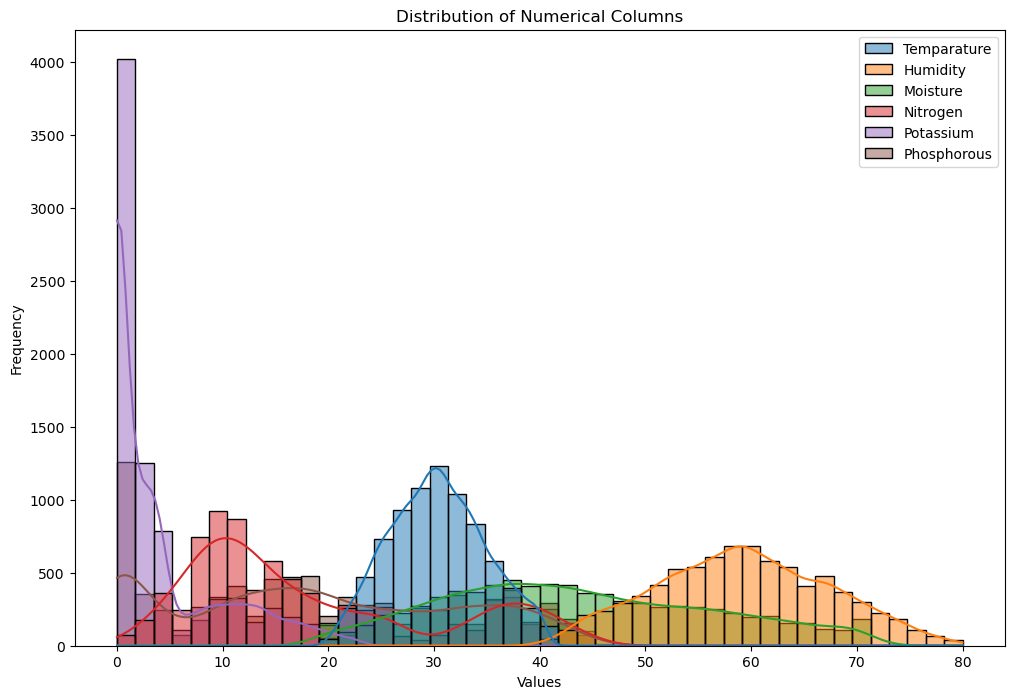

In [3]:
# Visualizing the distribution of numerical columns
plt.figure(figsize=(12, 8))
sns.histplot(df, kde=True)
plt.title('Distribution of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

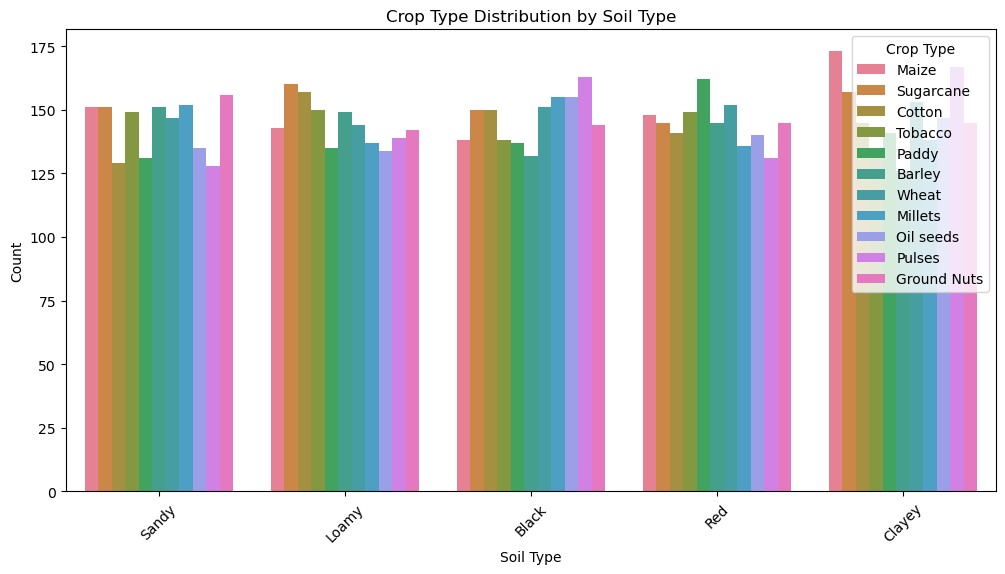

In [4]:
# Visualizing the relationship between Soil Type and Crop Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Soil Type', hue='Crop Type')
plt.title('Crop Type Distribution by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.legend(title='Crop Type')
plt.xticks(rotation=45)
plt.show()

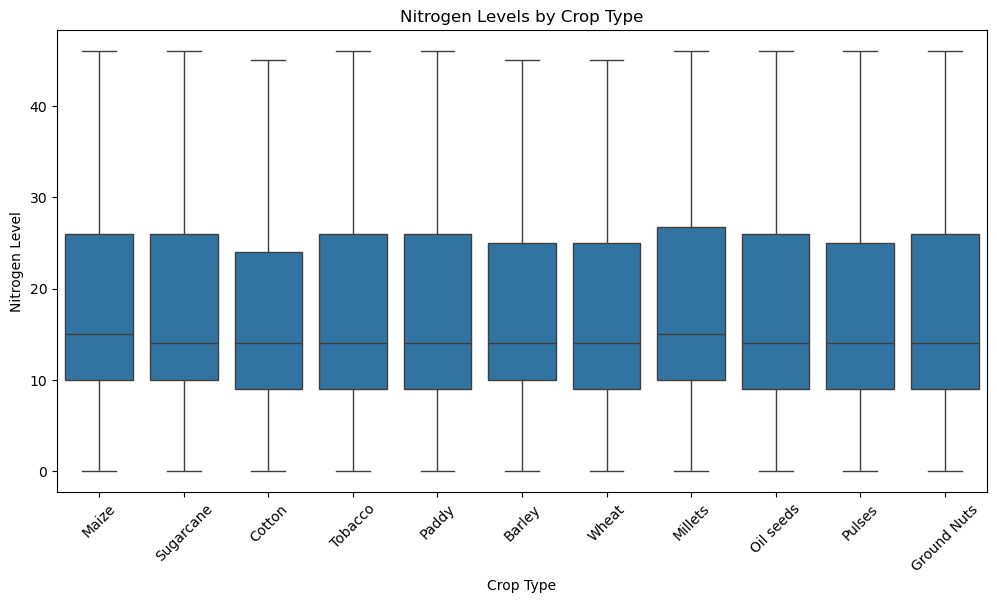

In [5]:
# Visualizing the relationship between Nitrogen levels and Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop Type', y='Nitrogen')
plt.title('Nitrogen Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Nitrogen Level')
plt.xticks(rotation=45)
plt.show()

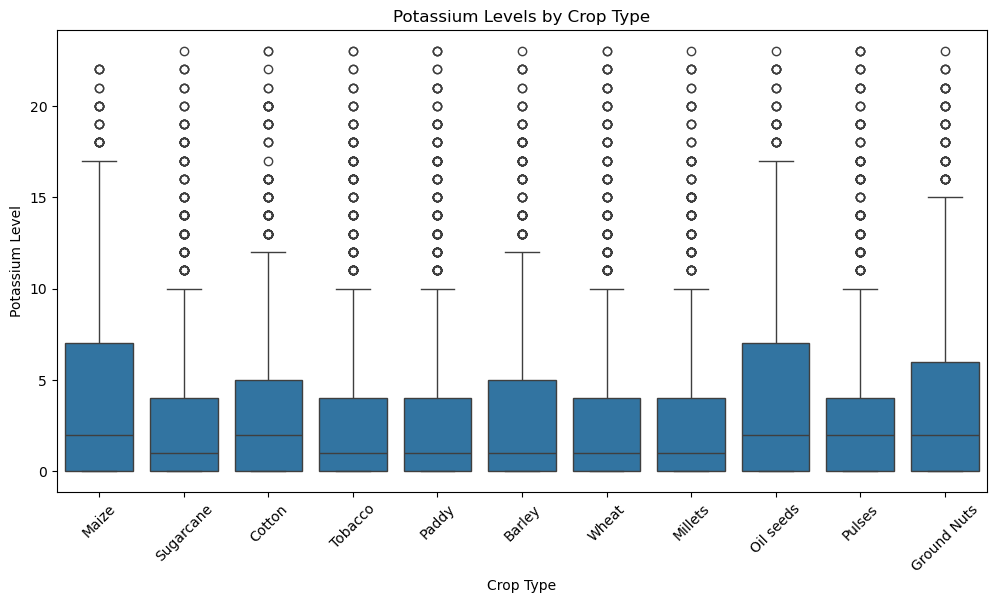

In [6]:
# Visualizing the relationship between Potassium levels and Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop Type', y='Potassium')
plt.title('Potassium Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Potassium Level')
plt.xticks(rotation=45)
plt.show()

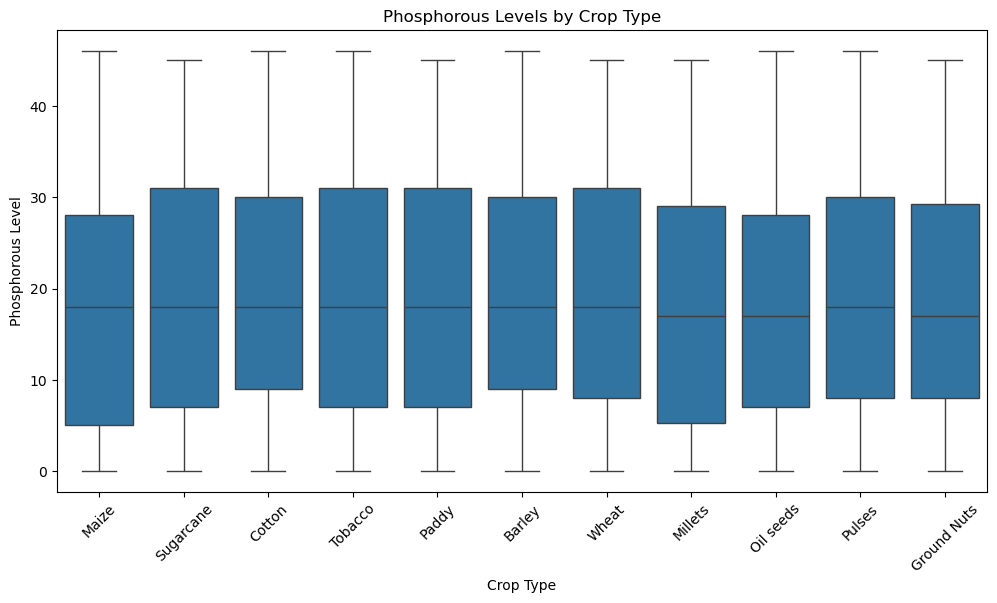

In [7]:
# Visualizing the relationship between Phosphorous levels and Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop Type', y='Phosphorous')
plt.title('Phosphorous Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Phosphorous Level')
plt.xticks(rotation=45)
plt.show()

             Nitrogen  Potassium  Phosphorous
Nitrogen     1.000000  -0.445762    -0.635694
Potassium   -0.445762   1.000000     0.056225
Phosphorous -0.635694   0.056225     1.000000


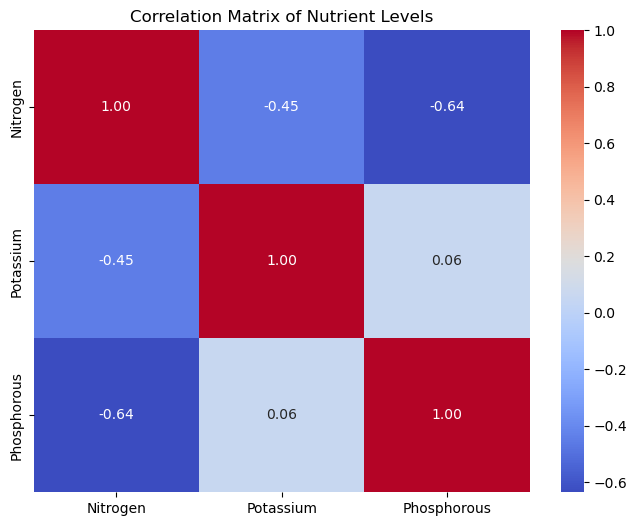

In [8]:
# Analyzing the correlation between Nitrogen, Potassium, and Phosphorous levels
correlation_matrix = df[['Nitrogen', 'Potassium', 'Phosphorous']].corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutrient Levels')
plt.show()

Summary of Correlations:
Nitrogen and Phosphorous: There is a strong negative correlation (-0.64), suggesting that as nitrogen levels increase, phosphorous levels tend to decrease, or vice versa.
Nitrogen and Potassium: There is a moderate negative correlation (-0.45), indicating a similar inverse relationship.
Potassium and Phosphorous: The correlation is weak (0.06), suggesting that these two nutrients do not have a significant linear relationship

In [9]:
# Since there is no 'Yield' column in the dataset, we cannot perform a regression analysis directly.
# However, we can create a synthetic 'Yield' column based on the existing nutrient levels for demonstration purposes.
# Let's create a simple linear combination of Nitrogen, Potassium, and Phosphorous to simulate crop yield.
import numpy as np

# Creating a synthetic yield based on a weighted sum of nutrients
np.random.seed(42)  # For reproducibility
weights = {'Nitrogen': 2, 'Potassium': 1.5, 'Phosphorous': 1}

# Calculating synthetic yield
df['Yield'] = (weights['Nitrogen'] * df['Nitrogen'] + 
               weights['Potassium'] * df['Potassium'] + 
               weights['Phosphorous'] * df['Phosphorous'] + 
               np.random.normal(0, 5, size=len(df)))  # Adding some noise

# Displaying the first few rows of the updated dataframe with the synthetic Yield column
print(df[['Nitrogen', 'Potassium', 'Phosphorous', 'Yield']].head())

   Nitrogen  Potassium  Phosphorous      Yield
0        37          0            0  76.483571
1        12          0           36  59.308678
2         7          9           30  60.738443
3        22          0           20  71.615149
4        35          0            0  68.829233


In [10]:
# Performing linear regression analysis to predict crop yield based on nutrient levels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the features and target variable
X = df[['Nitrogen', 'Potassium', 'Phosphorous']]
y = df['Yield']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the coefficients and performance metrics
coefficients = model.coef_
print('Coefficients:', coefficients)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Coefficients: [2.0001308  1.50660006 1.0029729 ]
Mean Squared Error: 25.725674539181963
R^2 Score: 0.9081831033628438
